## Sommaire : Analyse Exploratoire <a class="anchor" id="Sommaire"></a>

* [Chargement des données](#Partie1)
* [Analyse univariée](#Partie2)
    * [Variables qualitatives](#Partie2_1)
    * [Variables quantitatives](#Partie2_2)
* [Analyse bivariée](#Partie3)
    * [Variables catégorielles entre elles](#Partie3_1)
    * [Variables numériques entre elles](#Partie3_2)
    * [Variable numérique / catégorielle](#Partie3_3)
* [Analyse Multivariée](#Partie4)
    * [ACP](#Partie4_1)
    * [ANOVA](#Partie4_2)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import missingno as msno
import seaborn as sns

[Retour au sommaire](#Sommaire)

## Chargement des données <a class="anchor" id="Partie1"></a>

In [2]:
df_PlatsPrepares = pd.read_csv('df_food_nettoye.csv', sep=",")
df_PlatsPrepares['Nutrigrade'] = df_PlatsPrepares['Nutrigrade'].apply(lambda x: x.capitalize())

In [3]:
df_PlatsPrepares.head()

,Code,Nom du produit,Nom générique,Fabriqué_en_France,Produit_Bio,Produit_Végétarien,Catégorie du produit,Nutrigrade,Nutriscore,Energie,Additifs,Graisses,Graisses_saturées,Glucides,Sucres,Fibres,Protéines,Sel,Sodium
0,3560070723140,Poêlée de légumes croquants,Mélange de légumes assaisonnés surgelé,False,False,False,One-dish meals,A,-1.0,177.0,0.0,2.10,0.3,3.3,2.9,2.4,1.40,0.61976,0.244000
1,3222476292308,Lentilles aux Lardons,Salade de lentilles cuites aux lardons cuits f...,True,False,False,One-dish meals,A,-3.0,779.0,4.0,11.00,1.3,13.0,0.7,4.2,6.90,0.84000,0.330709
2,3222476101426,Boeuf bourguignon et ses tagliatelles,Boeuf bourguignon et ses tagliatelles aux oeuf...,True,False,False,One-dish meals,A,-3.0,505.0,4.0,3.33,0.9,14.0,1.5,1.7,7.67,0.46700,0.184000
3,3560070181902,Haricots blancs à la sauce tomate,NaN,False,False,False,One-dish meals,A,-2.0,361.0,1.0,0.60,0.2,13.0,2.4,4.9,4.30,1.01600,0.400000
4,3560070181933,Haricots blancs à la sauce tomate,NaN,False,False,False,One-dish meals,A,-3.0,240.0,1.0,0.50,0.0,12.0,1.0,4.7,4.80,1.00000,0.393701


In [4]:
df_PlatsPrepares.shape

(6747, 19)

In [5]:
df_PlatsPrepares_dup = df_PlatsPrepares[df_PlatsPrepares.duplicated()]
print("Le jeu de données contient", df_PlatsPrepares_dup.shape[0], "doublon(s).")

Le jeu de données contient 0 doublon(s).


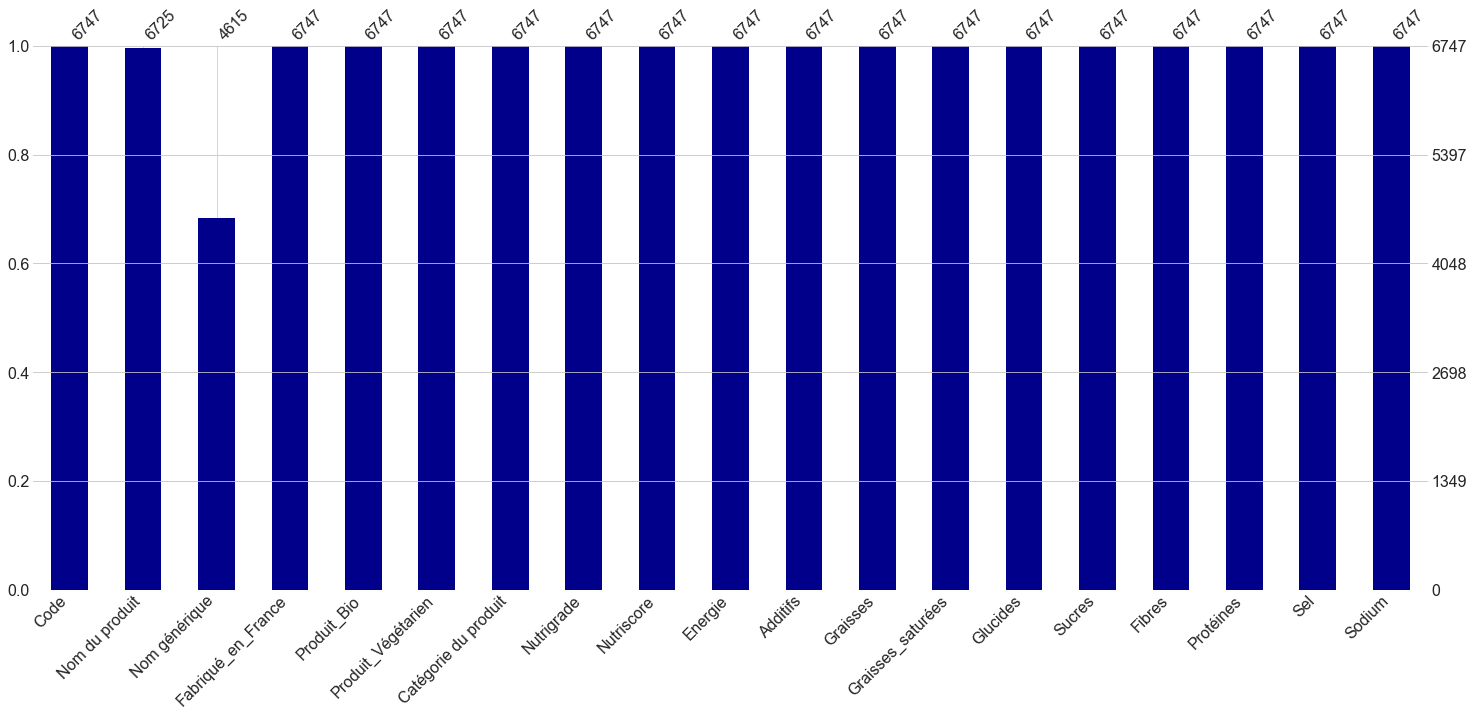

In [6]:
msno.bar(df_PlatsPrepares, color="darkblue")
plt.show()

[Retour au sommaire](#Sommaire)

## Analyse Univariée <a class="anchor" id="Partie2"></a>

### Variables qualitatives <a class="anchor" id="Partie2_1"></a>
Nos variables qualitatives sont ``Fabriqué en France``, ``Produit Bio``, ``Produit Végétarien``, ``Nutrigrade`` et ``Catégorie du produit``.

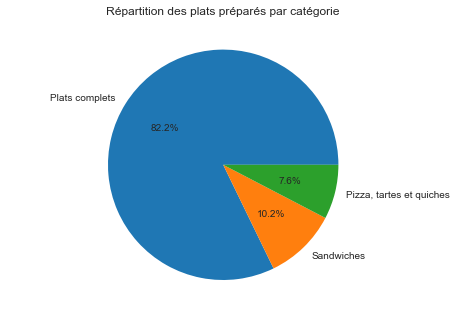

In [7]:
categories = df_PlatsPrepares['Catégorie du produit'].value_counts(normalize=False)
cat = pd.DataFrame({'catégorie':  categories.index, 'nombre': categories})
cat = cat.reset_index()
cat = cat.drop(cat.columns[0], axis=1)
values = cat['nombre']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(values, labels = ['Plats complets', 'Sandwiches', 'Pizza, tartes et quiches'], autopct='%1.1f%%')
plt.title('Répartition des plats préparés par catégorie')
plt.show()

In [8]:
Total = pd.crosstab(df_PlatsPrepares['Catégorie du produit'],
            df_PlatsPrepares['Fabriqué_en_France'].count(), 
            margins = False)
Total.columns = ['Total']

Fr = pd.crosstab(df_PlatsPrepares['Catégorie du produit'],
            df_PlatsPrepares['Fabriqué_en_France'], 
            margins = False)
Fr.columns = ['Fabriqué ailleurs', 'Fabriqué en France']

Bio = pd.crosstab(df_PlatsPrepares['Catégorie du produit'],
            df_PlatsPrepares['Produit_Bio'], 
            margins = False)
Bio.columns = ['Produit pas Bio', 'Produit Bio']

Vege = pd.crosstab(df_PlatsPrepares['Catégorie du produit'],
            df_PlatsPrepares['Produit_Végétarien'], 
            margins = False)
Vege.columns = ['Produit pas Végétarien', 'Produit Végétarien']

liste_df = [Fr, Bio, Vege]
new_list = []
for df in liste_df:
    df2 = df.astype(np.float64)
    for col in df.columns:
        for index in range(df[col].shape[0]):
            df2[col][index] = float(round(df[col][index]/Total['Total'][index], 3))
    new_list.append(df2)
[Fr, Bio, Vege] = new_list

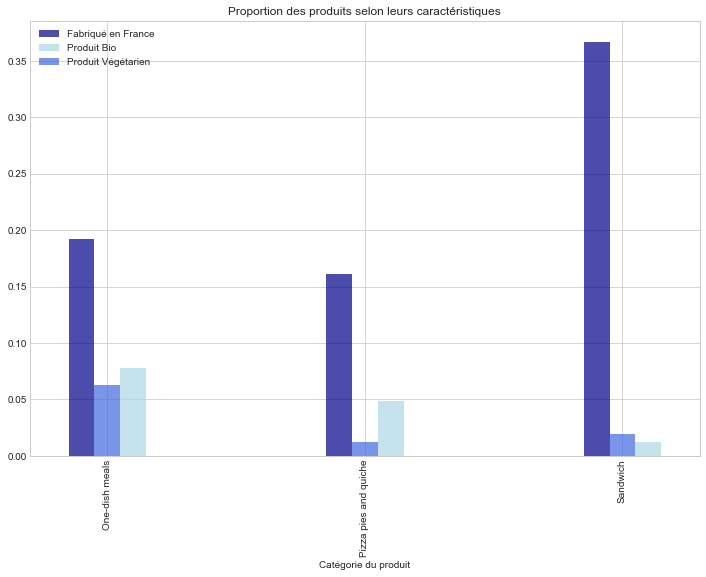

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
Fr['Fabriqué en France'].plot.bar(width=0.1, position=1.5, color="darkblue", ax=ax, alpha=0.7)
Bio['Produit Bio'].plot.bar(width=0.1, position=-0.5, color="lightblue", ax=ax, alpha=0.7)
Vege['Produit Végétarien'].plot.bar(width=0.1, position=0.5, color="royalblue", ax=ax, alpha=0.7)
plt.legend(loc="upper left")
plt.title('Proportion des produits selon leurs caractéristiques')
plt.show()

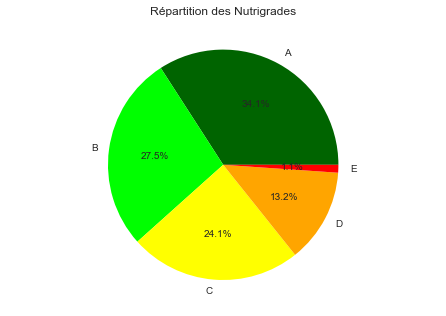

In [10]:
scores_count = df_PlatsPrepares['Nutrigrade'].value_counts(normalize=False)
nutriscores = pd.DataFrame({'score':  scores_count.index, 'nombre': scores_count})
nutriscores = nutriscores.sort_values(by='score')
nutriscores = nutriscores.reset_index()
nutriscores = nutriscores.drop(nutriscores.columns[0], axis=1)
values = nutriscores['nombre']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(values, labels = nutriscores['score'], colors=('darkgreen','lime', 'yellow', 'orange', 'red'), autopct='%1.1f%%')
plt.title('Répartition des Nutrigrades')
plt.show()

In [11]:
Pizza = df_PlatsPrepares[df_PlatsPrepares['Catégorie du produit'] == 'Pizza pies and quiche']
OneDish = df_PlatsPrepares[df_PlatsPrepares['Catégorie du produit'] == 'One-dish meals']
Sandwich = df_PlatsPrepares[df_PlatsPrepares['Catégorie du produit'] == 'Sandwich']

dfs = [Pizza, OneDish, Sandwich]
nom_dfs = ['Pizza, tartes et quiches', 'Plats Complets', 'Sandwiches']

fig = plt.figure(figsize=(18,10), dpi=1600)
plt.title('Répartition des nutrigrades', fontsize=20)
for i in range(3):
    df = dfs[i]
    scores_count = df['Nutrigrade'].value_counts(normalize=False)
    nutriscores = pd.DataFrame({'score':  scores_count.index, 'nombre': scores_count})
    nutriscores = nutriscores.sort_values(by='score')
    nutriscores = nutriscores.reset_index()
    nutriscores = nutriscores.drop(nutriscores.columns[0], axis=1)
    values = nutriscores['nombre']
    ax1 = plt.subplot2grid((1,3), (0, i))
    plt.pie(values, labels = nutriscores['score'], colors=('darkgreen','lime', 'yellow', 'orange', 'red'), autopct='%1.1f%%')
    plt.title(nom_dfs[i])
plt.show()

[Retour au sommaire](#Sommaire)

### Variables quantitatives <a class="anchor" id="Partie2_2"></a>
Nos variables quantitatives sont ``Nutriscore``, ``Energie`` et toutes les variables concernant nos ingrédients (``Additifs``, ``Graisses``...).

In [12]:
df_PlatsPrepares.describe()

,Code,Nutriscore,Energie,Additifs,Graisses,Graisses_saturées,Glucides,Sucres,Fibres,Protéines,Sel,Sodium
count,6.747000e+03,6747.000000,6747.000000,6747.000000,6747.000000,6747.000000,6747.000000,6747.000000,6747.000000,6747.000000,6747.000000,6747.000000
mean,3.705151e+12,2.506447,683.294840,2.867645,7.459895,2.458370,15.562818,2.358935,1.954115,7.484108,1.075167,0.423290
std,4.374757e+12,5.754701,329.064472,3.089216,5.154777,2.408054,11.067754,2.020059,1.439572,4.179348,1.018039,0.400790
min,1.362800e+04,-13.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.240932e+12,-2.000000,465.000000,1.000000,4.000000,0.900000,8.000000,1.200000,1.500000,5.000000,0.762000,0.300000
50%,3.270161e+12,1.000000,638.000000,2.000000,6.700000,1.800000,13.700000,2.000000,1.700000,7.000000,0.930000,0.366142
75%,3.564701e+12,4.000000,883.000000,4.000000,9.500000,3.200000,21.000000,3.000000,2.000000,9.700000,1.200000,0.472441
max,3.256221e+14,30.000000,3054.000000,21.000000,70.000000,28.200000,83.000000,33.000000,24.400000,44.000000,27.515820,10.833000


In [13]:
def decrit_variable(df, colonne, nb_bins):    
    # Histogramme
    sns.histplot(df[colonne], kde=True, bins=nb_bins);
    plt.show()
    
    # Boxplot
    cat = df['Catégorie du produit'].unique()
    cat_labels = ['Plats complets', 'Pizza, tartes et quiches', 'Sandwiches']
    groupes = []
    for c in cat:
        groupes.append(df[df['Catégorie du produit']==c][colonne].dropna())
    plt.style.use('fivethirtyeight')
    plt.title(colonne)
    plt.boxplot(groupes, labels=cat_labels, vert=True)
    
    plt.show()

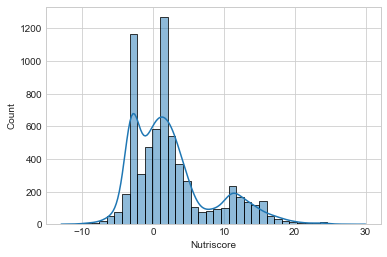

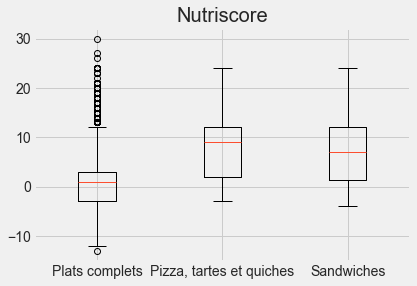

In [14]:
decrit_variable(df_PlatsPrepares, 'Nutriscore', 40)

La distribution de ``Nutriscore`` est bimodale.

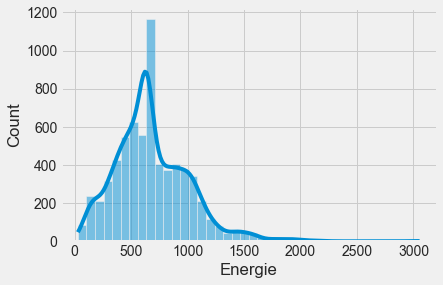

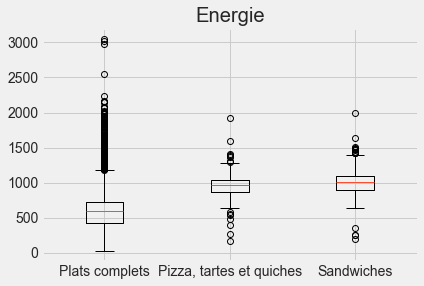

In [15]:
decrit_variable(df_PlatsPrepares, 'Energie', 40)

La distribution de ``Energie`` est multimodale.

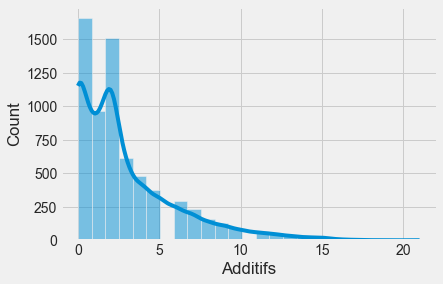

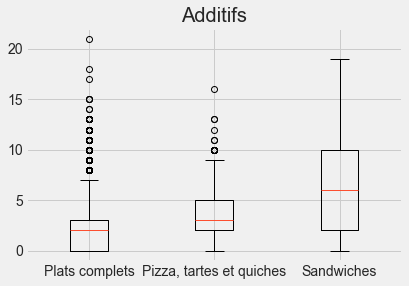

In [16]:
decrit_variable(df_PlatsPrepares, 'Additifs', 25)

La distribution de ``'Additifs'`` est bimodale.

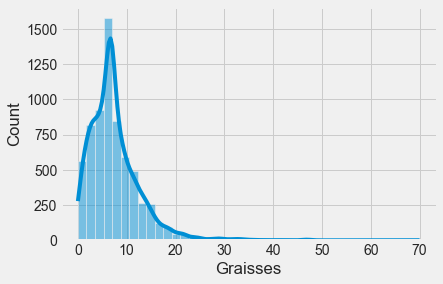

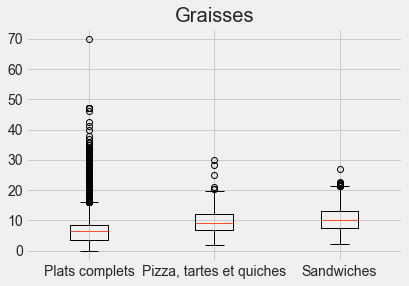

In [17]:
decrit_variable(df_PlatsPrepares, 'Graisses', 40)

La distribution de ``Graisses`` est unimodale.

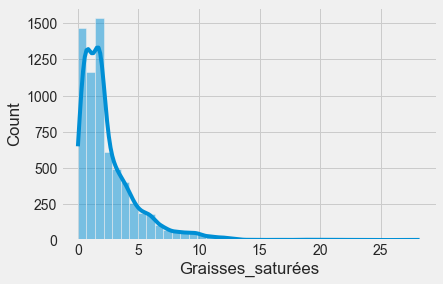

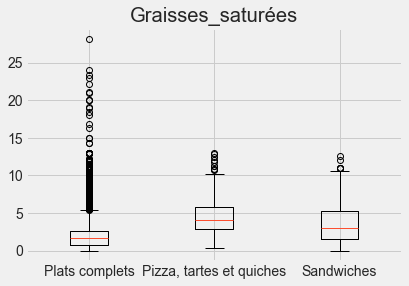

In [18]:
decrit_variable(df_PlatsPrepares, 'Graisses_saturées', 40)

La distribution de ``Graisses_saturées`` est bimodale.

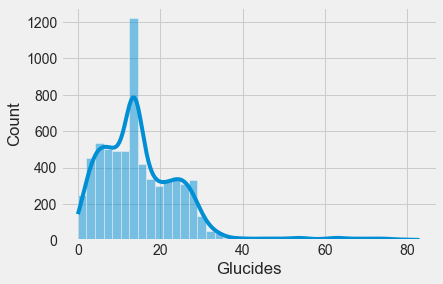

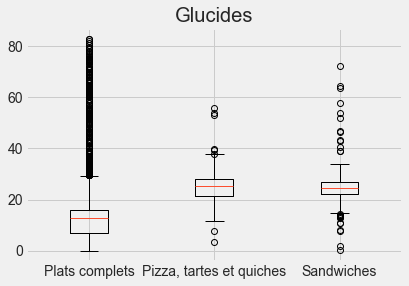

In [19]:
decrit_variable(df_PlatsPrepares, 'Glucides', 40)

La distribution de ``Glucides`` est multimodale.

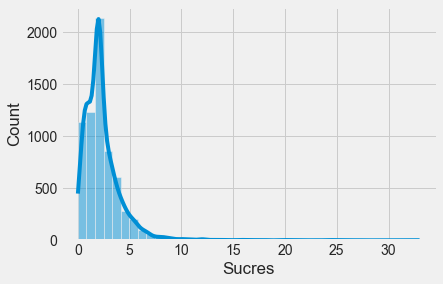

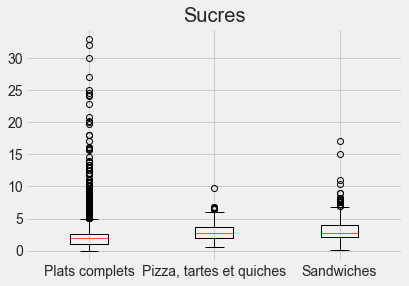

In [20]:
decrit_variable(df_PlatsPrepares, 'Sucres', 40)

La distribution de ``Sucres`` est unimodale.

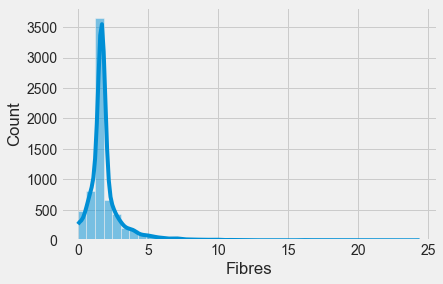

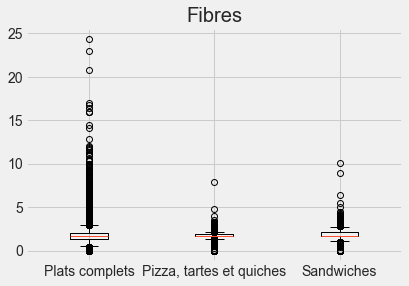

In [21]:
decrit_variable(df_PlatsPrepares, 'Fibres', 40)

La distribution de ``Fibres`` est unimodale.

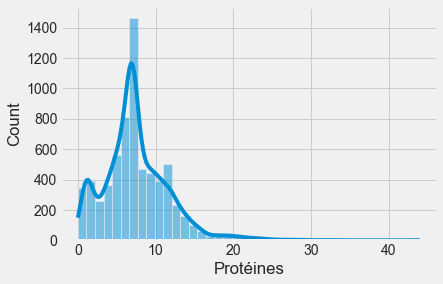

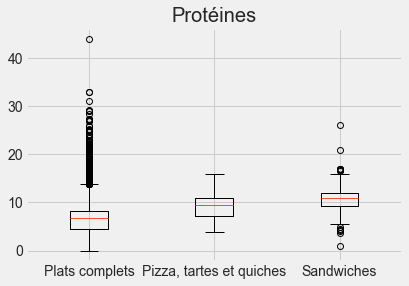

In [22]:
decrit_variable(df_PlatsPrepares, 'Protéines', 40)

La distribution de ``Protéines`` est bimodale.

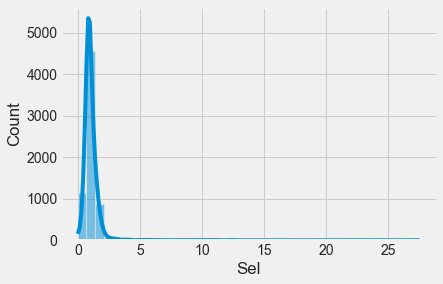

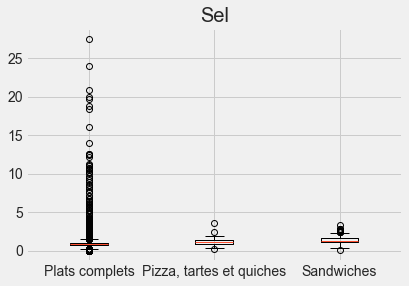

In [23]:
decrit_variable(df_PlatsPrepares, 'Sel', 40)

La distribution de ``Sel`` est unimodale.

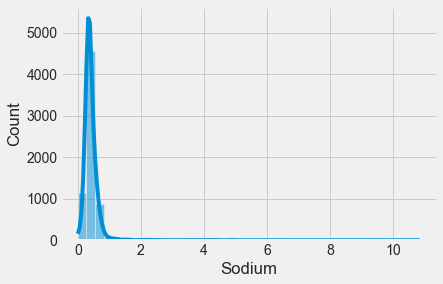

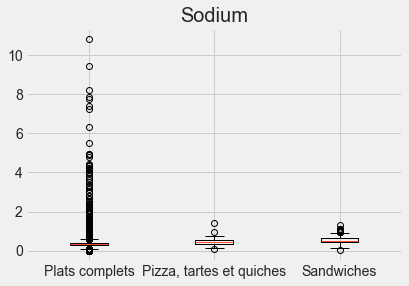

In [24]:
decrit_variable(df_PlatsPrepares, 'Sodium', 40)

La distribution de ``Sodium`` est unimodale.

[Retour au sommaire](#Sommaire)

## Analyse bivariée <a class="anchor" id="Partie3"></a>

In [25]:
df_PlatsPrepares.head()

,Code,Nom du produit,Nom générique,Fabriqué_en_France,Produit_Bio,Produit_Végétarien,Catégorie du produit,Nutrigrade,Nutriscore,Energie,Additifs,Graisses,Graisses_saturées,Glucides,Sucres,Fibres,Protéines,Sel,Sodium
0,3560070723140,Poêlée de légumes croquants,Mélange de légumes assaisonnés surgelé,False,False,False,One-dish meals,A,-1.0,177.0,0.0,2.10,0.3,3.3,2.9,2.4,1.40,0.61976,0.244000
1,3222476292308,Lentilles aux Lardons,Salade de lentilles cuites aux lardons cuits f...,True,False,False,One-dish meals,A,-3.0,779.0,4.0,11.00,1.3,13.0,0.7,4.2,6.90,0.84000,0.330709
2,3222476101426,Boeuf bourguignon et ses tagliatelles,Boeuf bourguignon et ses tagliatelles aux oeuf...,True,False,False,One-dish meals,A,-3.0,505.0,4.0,3.33,0.9,14.0,1.5,1.7,7.67,0.46700,0.184000
3,3560070181902,Haricots blancs à la sauce tomate,NaN,False,False,False,One-dish meals,A,-2.0,361.0,1.0,0.60,0.2,13.0,2.4,4.9,4.30,1.01600,0.400000
4,3560070181933,Haricots blancs à la sauce tomate,NaN,False,False,False,One-dish meals,A,-3.0,240.0,1.0,0.50,0.0,12.0,1.0,4.7,4.80,1.00000,0.393701


[Retour au sommaire](#Sommaire)

### Variables catégorielles entre elles <a class="anchor" id="Partie3_1"></a>

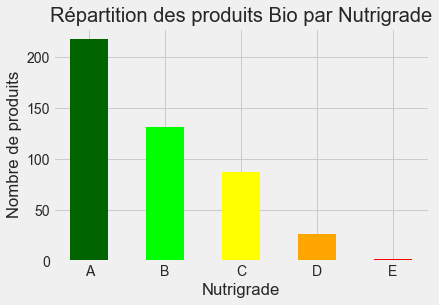

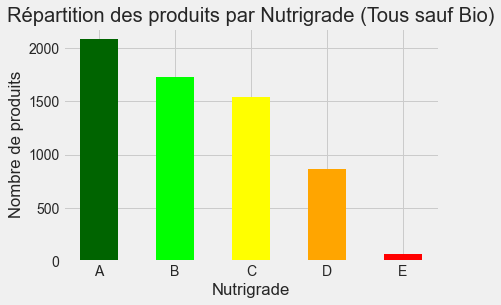

In [26]:
ProduitBio = pd.crosstab(df_PlatsPrepares['Nutrigrade'],
            df_PlatsPrepares['Produit_Bio'], 
            margins = False)
ProduitBio = ProduitBio.reset_index()

# Bar plot
plt.bar(['A', 'B', 'C', 'D', 'E'], ProduitBio[True], color =['darkgreen','lime', 'yellow', 'orange', 'red'],
        width = 0.5)
plt.xlabel('Nutrigrade')
plt.ylabel('Nombre de produits')
plt.title("Répartition des produits Bio par Nutrigrade")
plt.show()

plt.bar(['A', 'B', 'C', 'D', 'E'], ProduitBio[False], color =['darkgreen','lime', 'yellow', 'orange', 'red'],
        width = 0.5)
plt.xlabel('Nutrigrade')
plt.ylabel('Nombre de produits')
plt.title("Répartition des produits par Nutrigrade (Tous sauf Bio)")
plt.show()

[Retour au sommaire](#Sommaire)

### Variables numériques entre elles <a class="anchor" id="Partie3_2"></a>

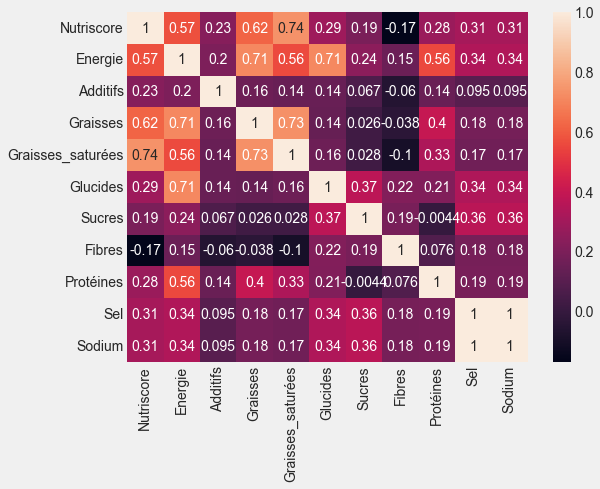

In [27]:
df_corr = df_PlatsPrepares.drop(df_PlatsPrepares.columns[[0,3,4,5]], axis=1)

corr_df = df_corr.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [28]:
def plot_correlation(df, colonneA, colonneB):
    SerieA = df[colonneA]
    SerieB = df[colonneB]

    X = np.matrix([np.ones(df.shape[0]), SerieA]).T
    y = np.matrix(SerieB).T

    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    plt.plot(SerieA, SerieB, 'ro', markersize=4)
    plt.plot([0, SerieA.max()], [theta.item(0), theta.item(0) + SerieA.max() * theta.item(1)], linestyle='--', c='#000000')
    plt.xlabel(colonneA)
    plt.ylabel(colonneB)
    plt.show()

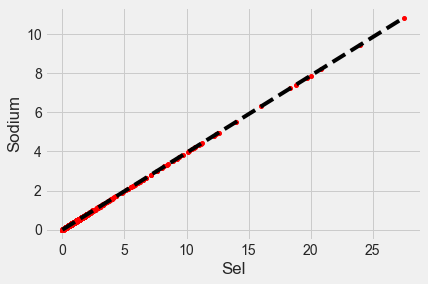

In [29]:
plot_correlation(df_PlatsPrepares, 'Sel', 'Sodium')

Les variables ``Sel`` et ``Sodium`` sont parfaitement corrélées, nous supprimerons une des deux variables pour notre ACP.

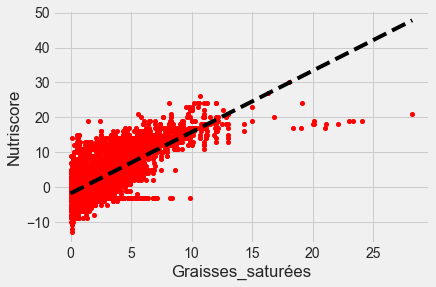

In [30]:
plot_correlation(df_PlatsPrepares, 'Graisses_saturées', 'Nutriscore')

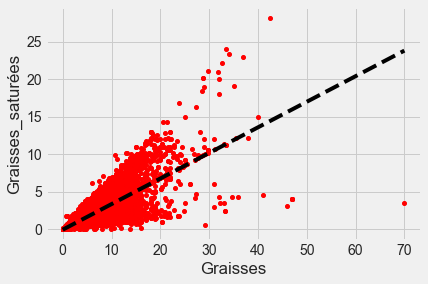

In [31]:
plot_correlation(df_PlatsPrepares, 'Graisses', 'Graisses_saturées')

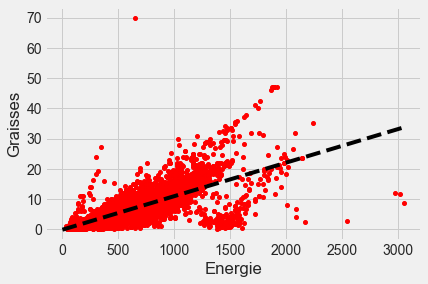

In [32]:
plot_correlation(df_PlatsPrepares, 'Energie', 'Graisses')

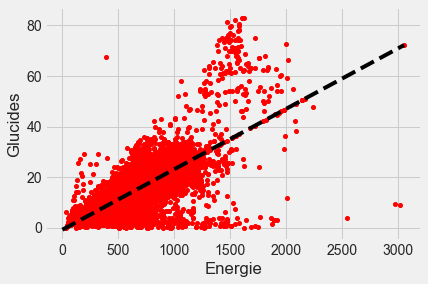

In [33]:
plot_correlation(df_PlatsPrepares, 'Energie', 'Glucides')

[Retour au sommaire](#Sommaire)

### Variable numérique / catégorielle <a class="anchor" id="Partie3_3"></a>

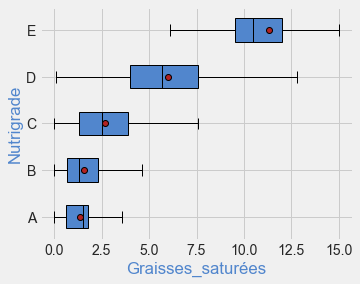

In [34]:
df_PlatsPrepares = df_PlatsPrepares.sort_values(by='Nutrigrade') # Pour que l'ordre des boxplots soit logique
fig, ax = plt.subplots(figsize=(5,4))
X = 'Nutrigrade' # qualitative
Y = 'Graisses_saturées' # quantitative

grades = df_PlatsPrepares[X].unique()
groupes = []
for g in grades:
    groupes.append(df_PlatsPrepares[df_PlatsPrepares[X]==g][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=grades, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
for box in bp['boxes']:
    box.set(color='black')
    box.set(facecolor = '#5186cd')
plt.xlabel(Y, color='#5186cd')
plt.ylabel(X, color='#5186cd')
plt.show()

Nous observons que lorsque les ``Graisses_saturées`` augmentent, le ``Nutrigrade`` devient de plus en plus mauvais.

Nous pouvons réaliser ce type de graphe pour toutes les variables numériques avec le nutrigrade mais nous le ferons dans la suite.

[Retour au sommaire](#Sommaire)

## Analyse multi-variée <a class="anchor" id="Partie4"></a>
### ACP : Analyse en Composantes Principales <a class="anchor" id="Partie4_1"></a>

In [35]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 10

# import de l'échantillon
data = df_PlatsPrepares.drop(df_PlatsPrepares.columns[[0,1,2,3,4,5,6,7,-1]], axis=1)

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_PlatsPrepares.drop(df_PlatsPrepares.columns[[0,1,2,3,4,5,6,7,-1]], axis=1)
data.head()

,Nutriscore,Energie,Additifs,Graisses,Graisses_saturées,Glucides,Sucres,Fibres,Protéines,Sel
0,-1.0,177.0,0.0,2.1,0.300000,3.3,2.9,2.4,1.4,0.61976
4873,-3.0,638.0,2.0,6.7,1.800000,13.7,2.0,1.7,7.0,0.93000
4874,-3.0,638.0,2.0,6.7,1.800000,13.7,2.0,1.7,7.0,0.93000
4875,-3.0,638.0,2.0,6.7,1.800000,13.7,2.0,1.7,7.0,0.93000
4876,-3.0,466.0,4.0,3.5,1.148399,11.6,2.0,1.7,8.3,0.93000


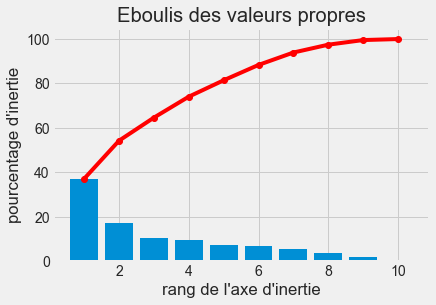

In [36]:
# Préparation des données pour l'ACP
X = data_pca.values
names = data.index
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

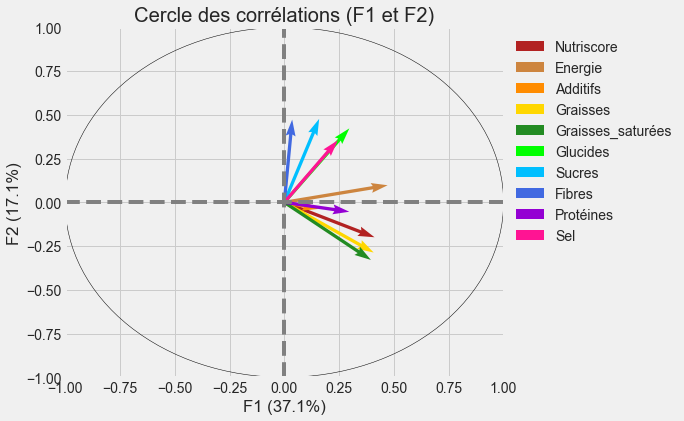

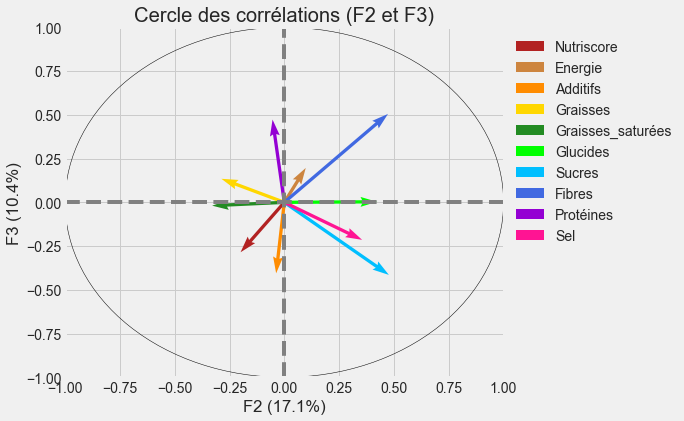

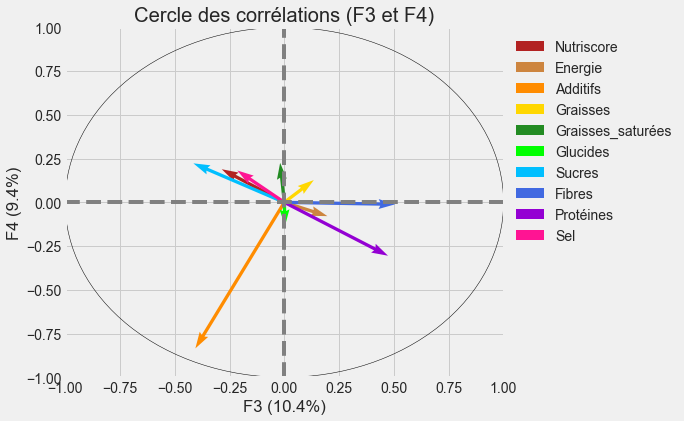

In [37]:
# Cercle des corrélations
pcs = pca.components_
couleurs = ['firebrick', 'peru', 'darkorange', 'gold', 'forestgreen', 'lime', 'deepskyblue', 'royalblue', 'darkviolet', 'deeppink']

for d1, d2 in [(0,1),(1,2),(2,3)]:
    if d2 < n_comp:

        # initialisation de la figure
        fig, ax = plt.subplots(figsize=(7,6))

        # détermination des limites du graphique
        if pcs.shape[1] < 30 :
            xmin, xmax, ymin, ymax = -1, 1, -1, 1
        else :
            xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

        # affichage des noms des variables  
        for i,(x, y) in enumerate(pcs[[d1,d2]].T):
            if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                plt.quiver(0, 0, pcs[d1,i], pcs[d2,i], angles='xy', scale_units='xy', scale=1, color=couleurs[i])
        plt.legend(np.array(features), loc='best', bbox_to_anchor =(1., 1))

        # affichage du cercle
        circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='black')
        plt.gca().add_artist(circle)

        # définition des limites du graphique
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)

        # affichage des lignes horizontales et verticales
        plt.plot([-1, 1], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-1, 1], color='grey', ls='--')

        # nom des axes, avec le pourcentage d'inertie expliqué
        plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
        plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

        plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
        plt.show(block=False)

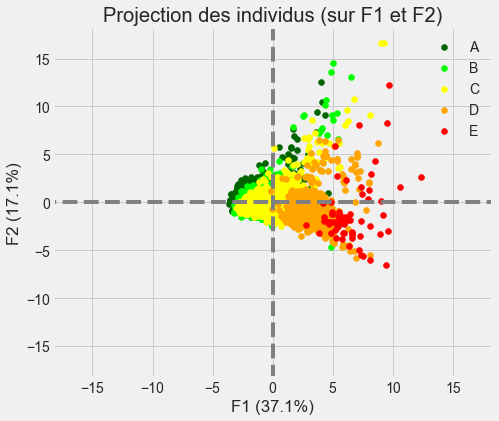

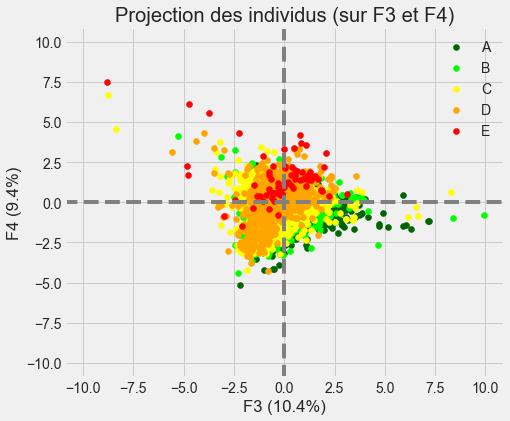

In [38]:
# Projection des individus
X_projected = pca.transform(X_scaled)

for d1,d2 in [(0,1), (2,3)]:
    if d2 < n_comp:
        # initialisation de la figure       
        fig = plt.figure(figsize=(7,6))

        # détermination des limites du graphique
        boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
        plt.xlim([-boundary,boundary])
        plt.ylim([-boundary,boundary])

        # affichage des lignes horizontales et verticales
        plt.plot([-100, 100], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-100, 100], color='grey', ls='--')

        # nom des axes, avec le pourcentage d'inertie expliqué
        plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
        plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

        colors = ['darkgreen','lime', 'yellow', 'orange', 'red']
        i = 0

        for cat in df_PlatsPrepares['Nutrigrade'].unique():
            df_cat = df_PlatsPrepares[df_PlatsPrepares['Nutrigrade'] == cat]
            data_pca_cat = df_cat.drop(df.columns[[0,1,2,3,4,5,6,7,-1]], axis=1)
            X_cat = data_pca_cat.values
            X_scaled_cat = std_scale.transform(X_cat)
            X_projected_cat = pca.transform(X_scaled_cat)
            # affichage des points
            plt.scatter(X_projected_cat[:, d1], X_projected_cat[:, d2], alpha=1, c=colors[i], label=cat)
            i = i + 1

        plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
        plt.legend()
        plt.show()

F1 est la composante principale (37%), donc on regarde la proximité sur cet axe. Nous remarquons donc que ``Nutriscore`` est lié aux ``Graisses``, aux ``Graisses_saturées`` et un peu à l'``Energie``.


Sur la projection des individus sur le plan F1F2, nous remarquons une décomposition selon le ``Nutrigrade`` du produit.

[Retour au sommaire](#Sommaire)

### Anova : ANalysis Of VAriance <a class="anchor" id="Partie4_2"></a>
Le but dans cette partie est d'évaluer la corrélation entre le ``Nutrigrade`` (variable qualitative) et les autres variables quantitatives.

In [39]:
df_PlatsPrepares.head()

,Code,Nom du produit,Nom générique,Fabriqué_en_France,Produit_Bio,Produit_Végétarien,Catégorie du produit,Nutrigrade,Nutriscore,Energie,Additifs,Graisses,Graisses_saturées,Glucides,Sucres,Fibres,Protéines,Sel,Sodium
0,3560070723140,Poêlée de légumes croquants,Mélange de légumes assaisonnés surgelé,False,False,False,One-dish meals,A,-1.0,177.0,0.0,2.1,0.300000,3.3,2.9,2.4,1.4,0.61976,0.244000
4873,3257984017976,Couscous poulet & merguez,NaN,False,False,False,One-dish meals,A,-3.0,638.0,2.0,6.7,1.800000,13.7,2.0,1.7,7.0,0.93000,0.366142
4874,3257984310619,Salade Mexicaine au thon,NaN,False,False,False,One-dish meals,A,-3.0,638.0,2.0,6.7,1.800000,13.7,2.0,1.7,7.0,0.93000,0.366142
4875,3258561470740,Hachis parmentier,NaN,False,False,False,One-dish meals,A,-3.0,638.0,2.0,6.7,1.800000,13.7,2.0,1.7,7.0,0.93000,0.366142
4876,3258561470801,Émincé de Poulet au curry et riz long,Émincé de poulet au curry et riz long,False,False,False,One-dish meals,A,-3.0,466.0,4.0,3.5,1.148399,11.6,2.0,1.7,8.3,0.93000,0.366142


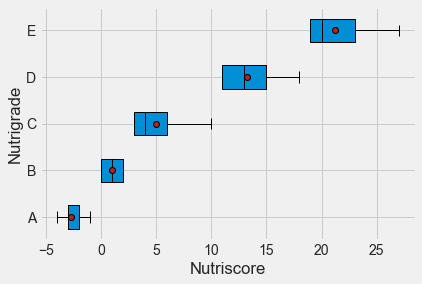

In [40]:
df_PlatsPrepares = df_PlatsPrepares.sort_values(by='Nutrigrade') # Pour que l'ordre des boxplots soit logique

X = 'Nutrigrade' # qualitative
Y = 'Nutriscore' # quantitative

grades = df_PlatsPrepares[X].unique()
groupes = []
for g in grades:
    groupes.append(df_PlatsPrepares[df_PlatsPrepares[X]==g][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=grades, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel(Y)
plt.ylabel(X)
plt.show()

In [41]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df_PlatsPrepares[X],df_PlatsPrepares[Y])

0.9224886428475053

On observe une évidente corrélation entre le ``Nutrigrade`` et le ``Nutriscore`` puisque le ``Nutrigrade`` a été attribué en fonction du ``Nutriscore``.

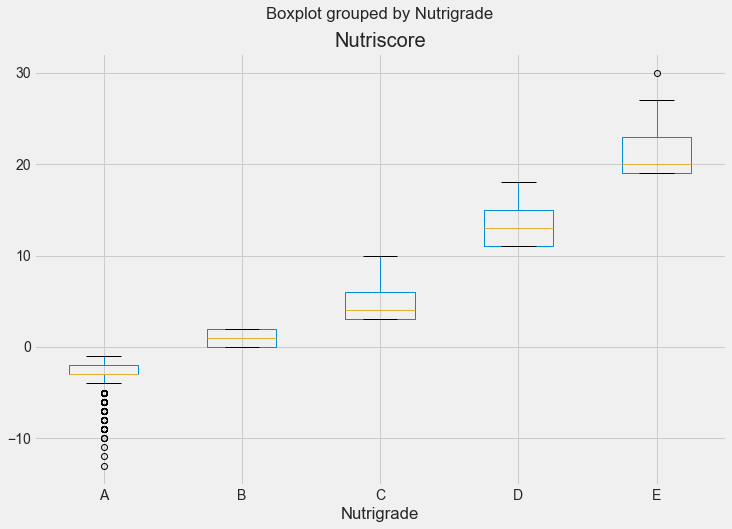

Valeur p pour Nutriscore = 0.0.
                            OLS Regression Results                            
Dep. Variable:             Nutriscore   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.006e+04
Date:                Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:33:21   Log-Likelihood:                -12753.
No. Observations:                6747   AIC:                         2.552e+04
Df Residuals:                    6742   BIC:                         2.555e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept 

In [42]:
from scipy import stats
import statsmodels.formula.api as smf

col_quali = 'Nutrigrade'
col_quanti = 'Nutriscore'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Nutriscore ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

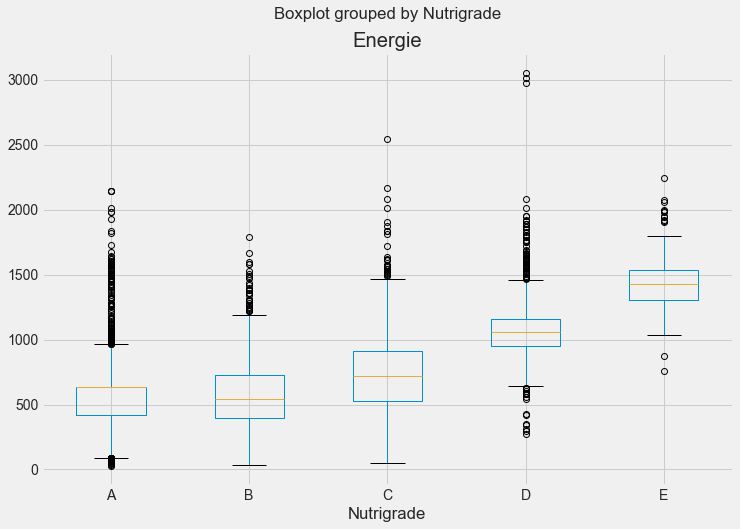

Valeur p pour Energie = 0.0.
                            OLS Regression Results                            
Dep. Variable:                Energie   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     821.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:33:21   Log-Likelihood:                -47341.
No. Observations:                6747   AIC:                         9.469e+04
Df Residuals:                    6742   BIC:                         9.473e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept    

In [43]:
col_quanti = 'Energie'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Energie ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

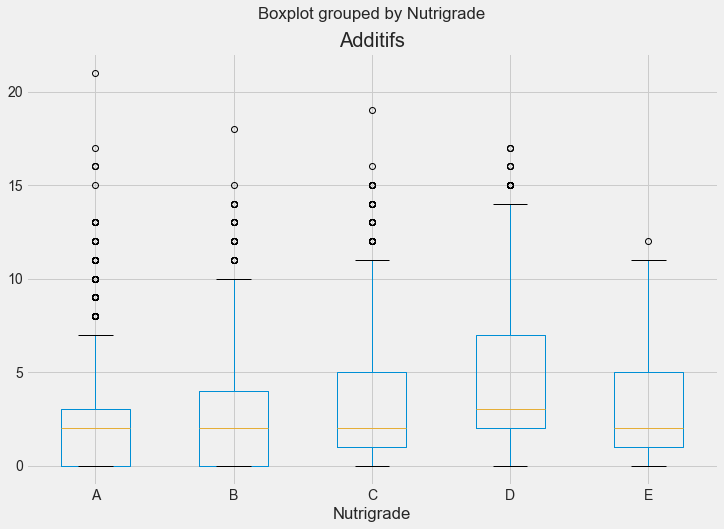

Valeur p pour Additifs = 1.9896457738960002e-75.
                            OLS Regression Results                            
Dep. Variable:               Additifs   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     90.95
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.99e-75
Time:                        12:33:22   Log-Likelihood:                -17006.
No. Observations:                6747   AIC:                         3.402e+04
Df Residuals:                    6742   BIC:                         3.406e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [44]:
col_quanti = 'Additifs'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Additifs ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

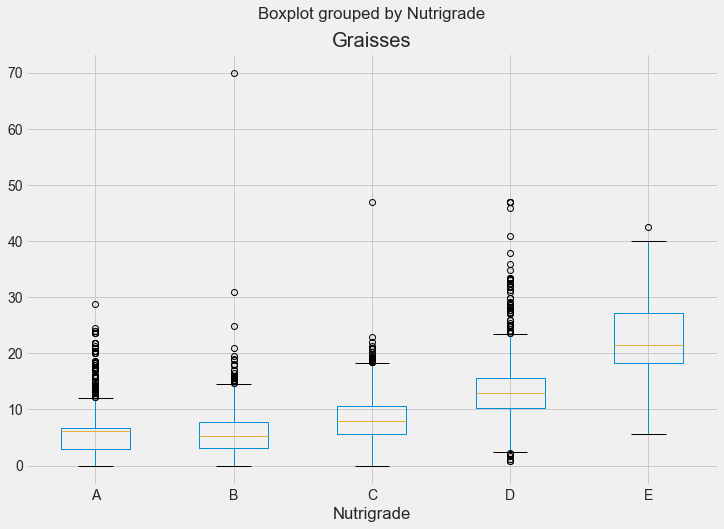

Valeur p pour Graisses = 0.0.
                            OLS Regression Results                            
Dep. Variable:               Graisses   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     1008.
Date:                Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:33:22   Log-Likelihood:                -19056.
No. Observations:                6747   AIC:                         3.812e+04
Df Residuals:                    6742   BIC:                         3.816e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept   

In [45]:
col_quanti = 'Graisses'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Graisses ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

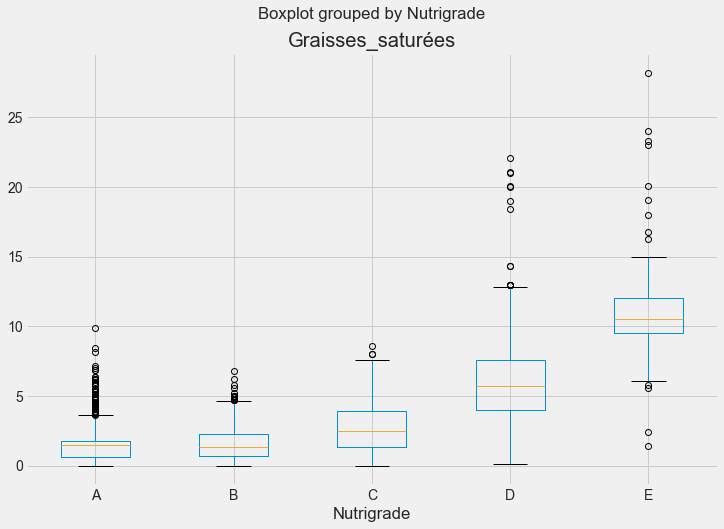

Valeur p pour Graisses_saturées = 0.0.
                            OLS Regression Results                            
Dep. Variable:      Graisses_saturées   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     2025.
Date:                Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:33:23   Log-Likelihood:                -12840.
No. Observations:                6747   AIC:                         2.569e+04
Df Residuals:                    6742   BIC:                         2.572e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Int

In [46]:
col_quanti = 'Graisses_saturées'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Graisses_saturées ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

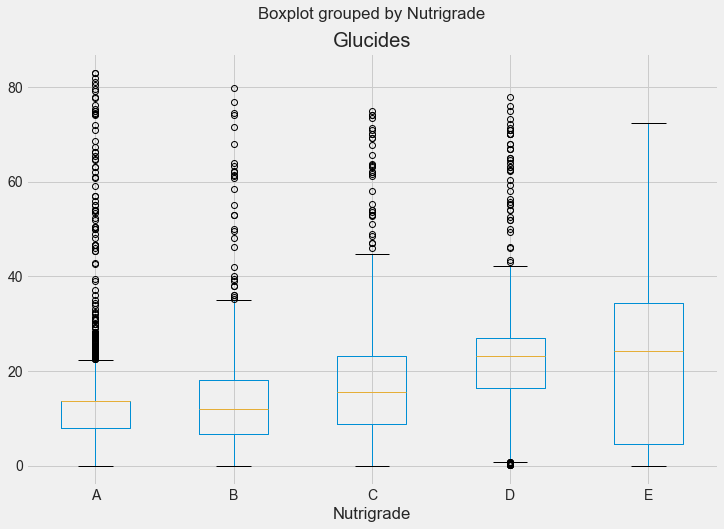

Valeur p pour Glucides = 7.585184085399439e-122.
                            OLS Regression Results                            
Dep. Variable:               Glucides   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     148.4
Date:                Fri, 15 Jul 2022   Prob (F-statistic):          7.59e-122
Time:                        12:33:24   Log-Likelihood:                -25508.
No. Observations:                6747   AIC:                         5.103e+04
Df Residuals:                    6742   BIC:                         5.106e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [47]:
col_quanti = 'Glucides'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Glucides ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

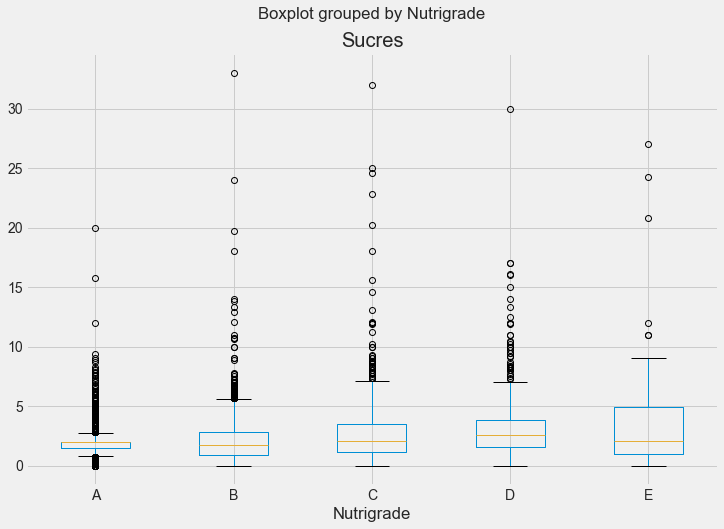

Valeur p pour Sucres = 2.1841108215015974e-53.
                            OLS Regression Results                            
Dep. Variable:                 Sucres   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     64.23
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           2.18e-53
Time:                        12:33:24   Log-Likelihood:                -14191.
No. Observations:                6747   AIC:                         2.839e+04
Df Residuals:                    6742   BIC:                         2.843e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [48]:
col_quanti = 'Sucres'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Sucres ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

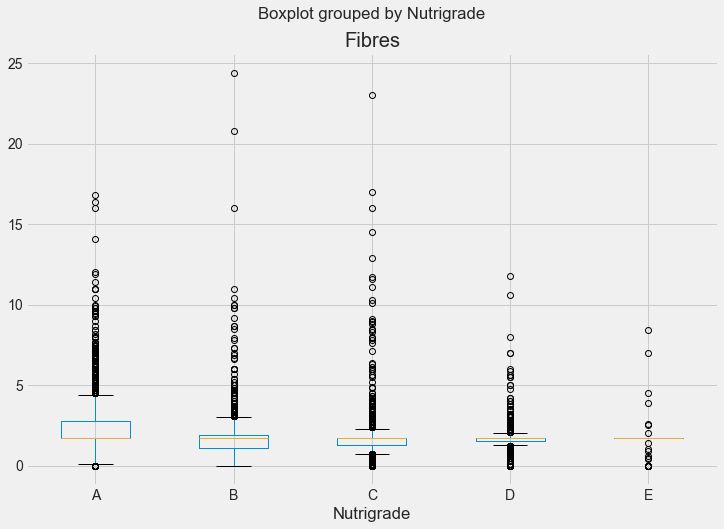

Valeur p pour Fibres = 6.647866848992565e-78.
                            OLS Regression Results                            
Dep. Variable:                 Fibres   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     93.97
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           6.65e-78
Time:                        12:33:25   Log-Likelihood:                -11848.
No. Observations:                6747   AIC:                         2.371e+04
Df Residuals:                    6742   BIC:                         2.374e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [49]:
col_quanti = 'Fibres'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Fibres ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

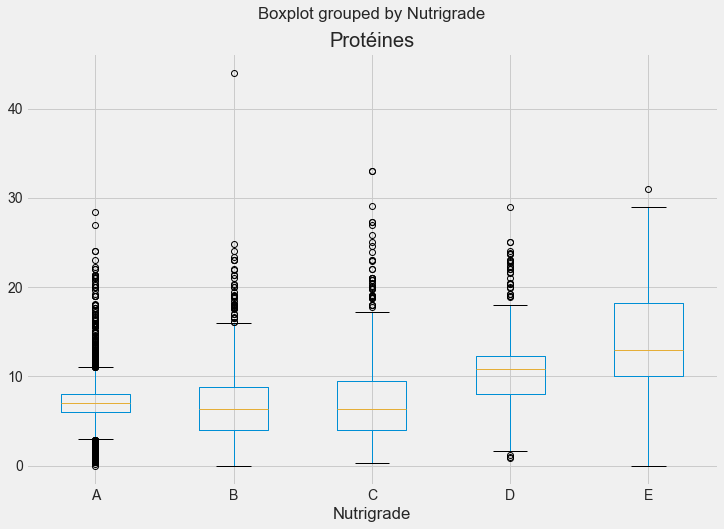

Valeur p pour Protéines = 4.871876340892792e-180.
                            OLS Regression Results                            
Dep. Variable:              Protéines   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     223.0
Date:                Fri, 15 Jul 2022   Prob (F-statistic):          4.87e-180
Time:                        12:33:25   Log-Likelihood:                -18803.
No. Observations:                6747   AIC:                         3.762e+04
Df Residuals:                    6742   BIC:                         3.765e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [50]:
col_quanti = 'Protéines'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Protéines ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

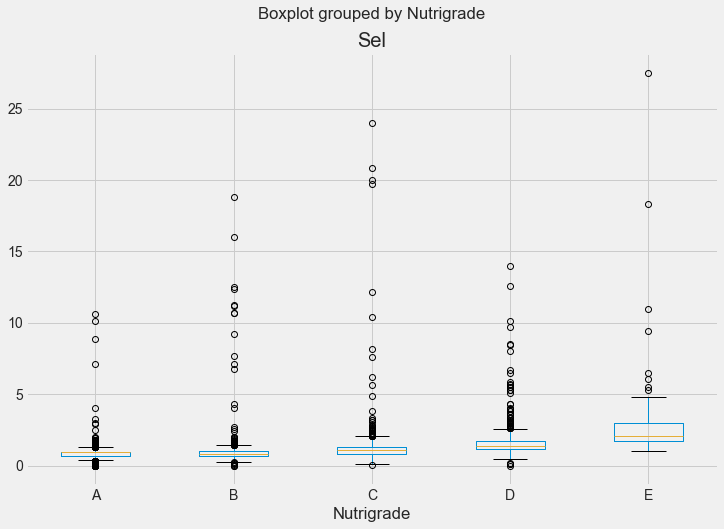

Valeur p pour Sel = 1.065161010120658e-159.
                            OLS Regression Results                            
Dep. Variable:                    Sel   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     196.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):          1.07e-159
Time:                        12:33:26   Log-Likelihood:                -9321.5
No. Observations:                6747   AIC:                         1.865e+04
Df Residuals:                    6742   BIC:                         1.869e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [51]:
col_quanti = 'Sel'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Sel ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

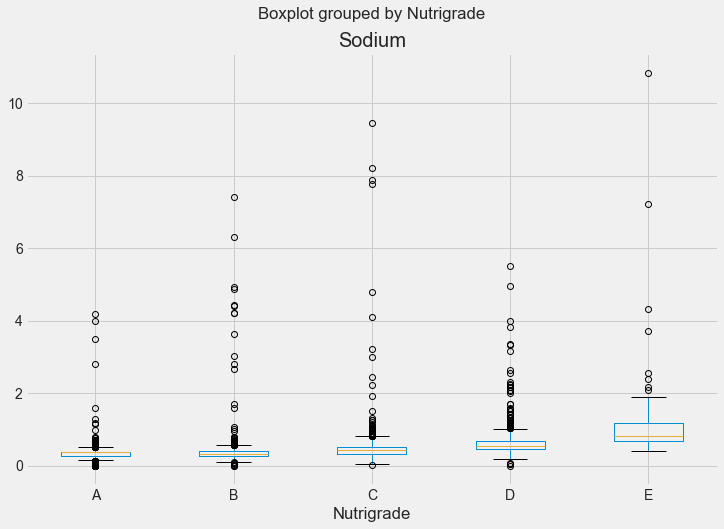

Valeur p pour Sodium = 1.0503107751050418e-159.
                            OLS Regression Results                            
Dep. Variable:                 Sodium   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     196.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):          1.05e-159
Time:                        12:33:26   Log-Likelihood:                -3032.0
No. Observations:                6747   AIC:                             6074.
Df Residuals:                    6742   BIC:                             6108.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [52]:
col_quanti = 'Sodium'

#Create a boxplot
df_PlatsPrepares.boxplot(col_quanti, by=col_quali, figsize=(12, 8))
plt.show()
d_data = {grp:df_PlatsPrepares[col_quanti][df_PlatsPrepares[col_quali] == grp] 
    for grp in pd.unique(df_PlatsPrepares[col_quali].values)}

F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'], d_data['E'])
print('Valeur p pour ' + str(col_quanti) + ' = ' + str(p) + '.')
    
anova = smf.ols(formula='Sodium ~ Nutrigrade', data=df_PlatsPrepares).fit()
print(anova.summary())

Pour toutes les variables étudiées, la p-value est inférieure à 0.05. Nous pouvons donc rejeter l'hypothèse nulle au seuil 0.05.
Pour chacune des variables, les moyennes des différents groupes ne sont pas identiques (au moins une moyenne est différente).